<a href="https://colab.research.google.com/github/coderman400/diet-rec/blob/main/dietrecb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import skfuzzy.control as ctrl

#Big dataset EDA

In [ ]:
file_path = "diet_recommendations_dataset.csv"
df = pd.read_csv(file_path)
df.head()

,Patient_ID,Age,Gender,Weight_kg,Height_cm,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Allergies,Preferred_Cuisine,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Dietary_Nutrient_Imbalance_Score,Diet_Recommendation
0,P0001,56,Male,58.4,160,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,Peanuts,Mexican,3.1,96.6,3.1,Balanced
1,P0002,69,Male,101.2,169,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,Peanuts,Chinese,4.5,63.2,0.6,Low_Carb
2,P0003,46,Female,63.5,173,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,Peanuts,Chinese,3.8,57.5,4.6,Low_Sodium
3,P0004,32,Male,58.1,164,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,NaN,Mexican,4.3,54.5,0.4,Balanced
4,P0005,60,Male,79.5,197,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,NaN,Italian,9.8,78.2,4.7,Low_Carb


In [ ]:
df.shape

(1000, 20)

In [ ]:
#drop unnecessary cols
df = df.drop(['Patient_ID','Weight_kg', 'Height_cm', 'Preferred_Cuisine', 'Allergies', 'Dietary_Nutrient_Imbalance_Score'], axis=1)
df.head(10)


,Age,Gender,BMI,Disease_Type,Severity,Physical_Activity_Level,Daily_Caloric_Intake,Cholesterol_mg/dL,Blood_Pressure_mmHg,Glucose_mg/dL,Dietary_Restrictions,Weekly_Exercise_Hours,Adherence_to_Diet_Plan,Diet_Recommendation
0,56,Male,22.8,Obesity,Moderate,Moderate,3079,173.3,133,116.3,NaN,3.1,96.6,Balanced
1,69,Male,35.4,Diabetes,Mild,Moderate,3032,199.2,120,137.1,NaN,4.5,63.2,Low_Carb
2,46,Female,21.2,Hypertension,Mild,Sedentary,1737,181.0,121,109.6,NaN,3.8,57.5,Low_Sodium
3,32,Male,21.6,NaN,Mild,Moderate,2657,168.2,144,159.4,NaN,4.3,54.5,Balanced
4,60,Male,20.5,Diabetes,Moderate,Sedentary,3496,200.4,172,182.3,Low_Sugar,9.8,78.2,Low_Carb
5,25,Female,43.4,Obesity,Severe,Active,2715,182.3,177,108.9,NaN,0.9,55.7,Balanced
6,78,Male,35.4,NaN,Mild,Active,2879,175.8,166,95.1,NaN,9.2,56.9,Balanced
7,38,Male,14.7,Diabetes,Severe,Moderate,1777,196.4,122,85.1,Low_Sodium,4.8,65.0,Low_Carb
8,56,Male,26.7,Obesity,Severe,Active,2541,163.3,132,150.1,NaN,6.2,64.1,Balanced
9,75,Male,23.2,Hypertension,Moderate,Active,2023,242.8,148,127.7,Low_Sodium,8.3,80.2,Low_Sodium


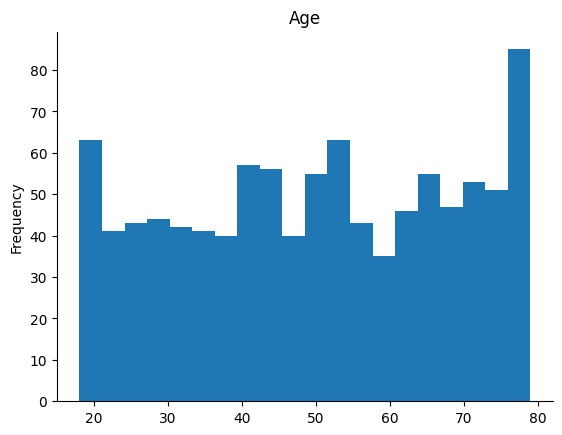

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

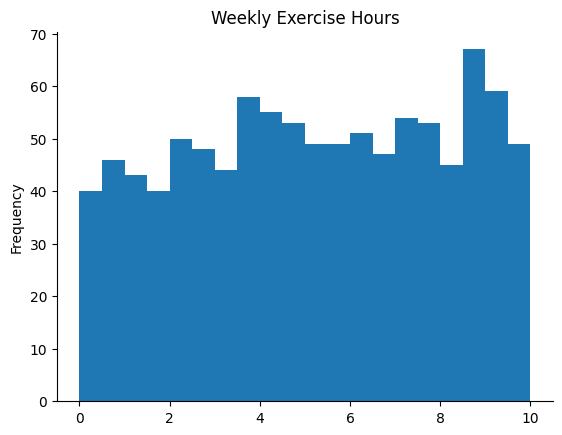

In [ ]:
#plot chart for target class Weekly_Exercise_Hours
df['Weekly_Exercise_Hours'].plot(kind='hist', bins=20, title='Weekly Exercise Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

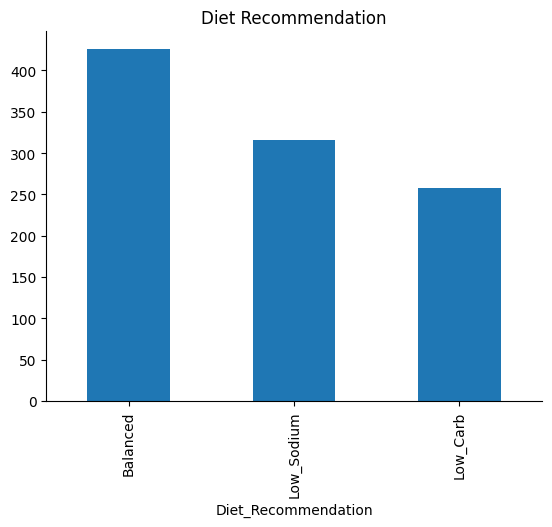

In [ ]:
#plot chart for target class Diet_Recommendation
df['Diet_Recommendation'].value_counts().plot(kind='bar', title='Diet Recommendation')
plt.gca().spines[['top', 'right',]].set_visible(False)

#Indian Food DB EDA

In [ ]:
#load Anuvaad_INDB_2024.11.xlsx into df
food_df = pd.read_excel('Anuvaad_INDB_2024.11.xlsx')
food_df.head()

,food_code,food_name,primarysource,energy_kj,energy_kcal,carb_g,protein_g,fat_g,freesugar_g,fibre_g,sfa_mg,mufa_mg,pufa_mg,cholesterol_mg,calcium_mg,phosphorus_mg,magnesium_mg,sodium_mg,potassium_mg,iron_mg,copper_mg,selenium_ug,chromium_mg,manganese_mg,molybdenum_mg,zinc_mg,vita_ug,vite_mg,vitd2_ug,vitd3_ug,vitk1_ug,vitk2_ug,folate_ug,vitb1_mg,vitb2_mg,vitb3_mg,vitb5_mg,vitb6_mg,vitb7_ug,vitb9_ug,vitc_mg,carotenoids_ug,servings_unit,unit_serving_energy_kj,unit_serving_energy_kcal,unit_serving_carb_g,unit_serving_protein_g,unit_serving_fat_g,unit_serving_freesugar_g,unit_serving_fibre_g,unit_serving_sfa_mg,unit_serving_mufa_mg,unit_serving_pufa_mg,unit_serving_cholesterol_mg,unit_serving_calcium_mg,unit_serving_phosphorus_mg,unit_serving_magnesium_mg,unit_serving_sodium_mg,unit_serving_potassium_mg,unit_serving_iron_mg,unit_serving_copper_mg,unit_serving_selenium_ug,unit_serving_chromium_mg,unit_serving_manganese_mg,unit_serving_molybdenum_mg,unit_serving_zinc_mg,unit_serving_vita_ug,unit_serving_vite_mg,unit_serving_vitd2_ug,unit_serving_vitd3_ug,unit_serving_vitk1_ug,unit_serving_vitk2_ug,unit_serving_folate_ug,unit_serving_vitb1_mg,unit_serving_vitb2_mg,unit_serving_vitb3_mg,unit_serving_vitb5_mg,unit_serving_vitb6_mg,unit_serving_vitb7_ug,unit_serving_vitb9_ug,unit_serving_vitc_mg,unit_serving_carotenoids_ug
0,ASC001,Hot tea (Garam Chai),asc_manual,68.161522,16.144299,2.581948,0.387886,0.532067,2.576010,0.000000,321.496429,144.180527,16.389549,0.0,14.204275,11.501187,1.035629,3.118765,13.945368,0.021615,0.005914,0.112827,0.000475,0.002257,0.000000,0.041093,0.0,0.026128,0.000000,0.0,0.001924,0.0,0.856295,0.003563,0.013207,0.009501,0.040665,0.004751,0.242280,0.856295,0.238717,23.752970,tea cup,143.479996,33.983749,5.435000,0.816500,1.120000,5.422500,0.000000,676.750000,303.500000,34.500000,0.0,29.900000,24.209999,2.1800,6.565000,29.355000,0.045500,0.012450,0.237500,0.001000,0.004750,0.0000,0.086500,0.0,0.05500,0.000000,0.0,0.00405,0.0,1.8025,0.007500,0.027800,0.02000,0.08560,0.010000,0.510000,1.8025,0.502500,50.000000
1,ASC002,Instant coffee,asc_manual,97.766670,23.155832,3.653333,0.640667,0.746667,3.615000,0.000000,451.166656,202.333328,23.000000,0.0,20.866667,18.186666,3.633333,4.916667,44.500000,0.061000,0.012333,0.218333,0.000667,0.015667,0.000000,0.065000,0.0,0.036667,0.000000,0.0,0.028667,0.0,1.245000,0.005267,0.019733,0.178667,0.056667,0.006800,0.776667,1.245000,0.335000,33.333332,tea cup,439.950012,104.201248,16.440001,2.883000,3.360000,16.267500,0.000000,2030.250000,910.500000,103.500000,0.0,93.900002,81.839996,16.3500,22.125000,200.250000,0.274500,0.055500,0.982500,0.003000,0.070500,0.0000,0.292500,0.0,0.16500,0.000000,0.0,0.12900,0.0,5.6025,0.023700,0.088800,0.80400,0.25500,0.030600,3.495000,5.6025,1.507500,150.000000
2,ASC003,Espreso coffee,asc_manual,216.996841,51.543373,6.620505,1.747003,2.138170,6.533754,0.000000,1291.671875,580.157715,66.214508,0.0,58.104099,50.249210,8.574133,13.977918,103.864349,0.147634,0.038202,0.563091,0.001893,0.034385,0.000000,0.191483,0.0,0.105394,0.000000,0.0,0.054259,0.0,3.487382,0.014763,0.054890,0.352681,0.161830,0.019211,1.810726,3.487382,0.951104,94.637222,tea cup,343.940002,81.696251,10.493500,2.769000,3.389000,10.356000,0.000000,2047.300049,919.549988,104.949997,0.0,92.095001,79.644997,13.5900,22.154999,164.625000,0.234000,0.060550,0.892500,0.003000,0.054500,0.0000,0.303500,0.0,0.16705,0.000000,0.0,0.08600,0.0,5.5275,0.023400,0.087000,0.55900,0.25650,0.030450,2.870000,5.5275,1.507500,150.000000
3,ASC004,Iced tea,asc_manual,44.090622,10.342188,2.701562,0.027969,0.010937,2.701562,0.000000,5.468750,0.000000,5.468750,0.0,1.179688,0.584375,0.390625,0.234375,5.215625,0.021406,0.003063,0.054688,0.000000,0.000938,0.000000,0.007969,0.0,0.000000,0.000000,0.0,0.001688,0.0,0.401563,0.001641,0.000672,0.005469,0.006812,0.002734,0.006250,0.401563,1.859375,0.218750,tall glass,141.089996,33.095001,8.645000,0.089500,0.035000,8.645000,0.000000,17.500000,0.000000,17.500000,0.0,3.775000,1.870000,1

In [ ]:
food_df.shape

(1014, 82)

In [ ]:
food_df = food_df.drop(['food_code','primarysource'], axis=1)
food_df.head()

,food_name,energy_kj,energy_kcal,carb_g,protein_g,fat_g,freesugar_g,fibre_g,sfa_mg,mufa_mg,pufa_mg,cholesterol_mg,calcium_mg,phosphorus_mg,magnesium_mg,sodium_mg,potassium_mg,iron_mg,copper_mg,selenium_ug,chromium_mg,manganese_mg,molybdenum_mg,zinc_mg,vita_ug,vite_mg,vitd2_ug,vitd3_ug,vitk1_ug,vitk2_ug,folate_ug,vitb1_mg,vitb2_mg,vitb3_mg,vitb5_mg,vitb6_mg,vitb7_ug,vitb9_ug,vitc_mg,carotenoids_ug,servings_unit,unit_serving_energy_kj,unit_serving_energy_kcal,unit_serving_carb_g,unit_serving_protein_g,unit_serving_fat_g,unit_serving_freesugar_g,unit_serving_fibre_g,unit_serving_sfa_mg,unit_serving_mufa_mg,unit_serving_pufa_mg,unit_serving_cholesterol_mg,unit_serving_calcium_mg,unit_serving_phosphorus_mg,unit_serving_magnesium_mg,unit_serving_sodium_mg,unit_serving_potassium_mg,unit_serving_iron_mg,unit_serving_copper_mg,unit_serving_selenium_ug,unit_serving_chromium_mg,unit_serving_manganese_mg,unit_serving_molybdenum_mg,unit_serving_zinc_mg,unit_serving_vita_ug,unit_serving_vite_mg,unit_serving_vitd2_ug,unit_serving_vitd3_ug,unit_serving_vitk1_ug,unit_serving_vitk2_ug,unit_serving_folate_ug,unit_serving_vitb1_mg,unit_serving_vitb2_mg,unit_serving_vitb3_mg,unit_serving_vitb5_mg,unit_serving_vitb6_mg,unit_serving_vitb7_ug,unit_serving_vitb9_ug,unit_serving_vitc_mg,unit_serving_carotenoids_ug
0,Hot tea (Garam Chai),68.161522,16.144299,2.581948,0.387886,0.532067,2.576010,0.000000,321.496429,144.180527,16.389549,0.0,14.204275,11.501187,1.035629,3.118765,13.945368,0.021615,0.005914,0.112827,0.000475,0.002257,0.000000,0.041093,0.0,0.026128,0.000000,0.0,0.001924,0.0,0.856295,0.003563,0.013207,0.009501,0.040665,0.004751,0.242280,0.856295,0.238717,23.752970,tea cup,143.479996,33.983749,5.435000,0.816500,1.120000,5.422500,0.000000,676.750000,303.500000,34.500000,0.0,29.900000,24.209999,2.1800,6.565000,29.355000,0.045500,0.012450,0.237500,0.001000,0.004750,0.0000,0.086500,0.0,0.05500,0.000000,0.0,0.00405,0.0,1.8025,0.007500,0.027800,0.02000,0.08560,0.010000,0.510000,1.8025,0.502500,50.000000
1,Instant coffee,97.766670,23.155832,3.653333,0.640667,0.746667,3.615000,0.000000,451.166656,202.333328,23.000000,0.0,20.866667,18.186666,3.633333,4.916667,44.500000,0.061000,0.012333,0.218333,0.000667,0.015667,0.000000,0.065000,0.0,0.036667,0.000000,0.0,0.028667,0.0,1.245000,0.005267,0.019733,0.178667,0.056667,0.006800,0.776667,1.245000,0.335000,33.333332,tea cup,439.950012,104.201248,16.440001,2.883000,3.360000,16.267500,0.000000,2030.250000,910.500000,103.500000,0.0,93.900002,81.839996,16.3500,22.125000,200.250000,0.274500,0.055500,0.982500,0.003000,0.070500,0.0000,0.292500,0.0,0.16500,0.000000,0.0,0.12900,0.0,5.6025,0.023700,0.088800,0.80400,0.25500,0.030600,3.495000,5.6025,1.507500,150.000000
2,Espreso coffee,216.996841,51.543373,6.620505,1.747003,2.138170,6.533754,0.000000,1291.671875,580.157715,66.214508,0.0,58.104099,50.249210,8.574133,13.977918,103.864349,0.147634,0.038202,0.563091,0.001893,0.034385,0.000000,0.191483,0.0,0.105394,0.000000,0.0,0.054259,0.0,3.487382,0.014763,0.054890,0.352681,0.161830,0.019211,1.810726,3.487382,0.951104,94.637222,tea cup,343.940002,81.696251,10.493500,2.769000,3.389000,10.356000,0.000000,2047.300049,919.549988,104.949997,0.0,92.095001,79.644997,13.5900,22.154999,164.625000,0.234000,0.060550,0.892500,0.003000,0.054500,0.0000,0.303500,0.0,0.16705,0.000000,0.0,0.08600,0.0,5.5275,0.023400,0.087000,0.55900,0.25650,0.030450,2.870000,5.5275,1.507500,150.000000
3,Iced tea,44.090622,10.342188,2.701562,0.027969,0.010937,2.701562,0.000000,5.468750,0.000000,5.468750,0.0,1.179688,0.584375,0.390625,0.234375,5.215625,0.021406,0.003063,0.054688,0.000000,0.000938,0.000000,0.007969,0.0,0.000000,0.000000,0.0,0.001688,0.0,0.401563,0.001641,0.000672,0.005469,0.006812,0.002734,0.006250,0.401563,1.859375,0.218750,tall glass,141.089996,33.095001,8.645000,0.089500,0.035000,8.645000,0.000000,17.500000,0.000000,17.500000,0.0,3.775000,1.870000,1.2500,0.750000,16.690001,0.068500,0.009800,0.175000,0.000000,0.003000,0.0000,0.025500,0.0,0.0000

In [ ]:
food_df.columns

Index(['food_name', 'energy_kj', 'energy_kcal', 'carb_g', 'protein_g', 'fat_g',
       'freesugar_g', 'fibre_g', 'sfa_mg', 'mufa_mg', 'pufa_mg',
       'cholesterol_mg', 'calcium_mg', 'phosphorus_mg', 'magnesium_mg',
       'sodium_mg', 'potassium_mg', 'iron_mg', 'copper_mg', 'selenium_ug',
       'chromium_mg', 'manganese_mg', 'molybdenum_mg', 'zinc_mg', 'vita_ug',
       'vite_mg', 'vitd2_ug', 'vitd3_ug', 'vitk1_ug', 'vitk2_ug', 'folate_ug',
       'vitb1_mg', 'vitb2_mg', 'vitb3_mg', 'vitb5_mg', 'vitb6_mg', 'vitb7_ug',
       'vitb9_ug', 'vitc_mg', 'carotenoids_ug', 'servings_unit',
       'unit_serving_energy_kj', 'unit_serving_energy_kcal',
       'unit_serving_carb_g', 'unit_serving_protein_g', 'unit_serving_fat_g',
       'unit_serving_freesugar_g', 'unit_serving_fibre_g',
       'unit_serving_sfa_mg', 'unit_serving_mufa_mg', 'unit_serving_pufa_mg',
       'unit_serving_cholesterol_mg', 'unit_serving_calcium_mg',
       'unit_serving_phosphorus_mg', 'unit_serving_magnesium_mg',
 

In [ ]:
def classify_diet(row):
    classes = []

    # Calculate net carbs and energy ratios
    net_carbs = row['carb_g'] - row['fibre_g']
    protein_ratio = (row['protein_g'] * 4) / row['energy_kcal'] if row['energy_kcal'] > 0 else 0
    fat_density = (row['fat_g'] / (row['energy_kcal'] / 100)) if row['energy_kcal'] > 0 else 999

    # Adjusted Classification thresholds
    if net_carbs < 40:  # Increased threshold for balanced carbs
        classes.append('Low_Carb')

    if row['sodium_mg'] < 1000:  # Increased threshold for sodium
        classes.append('Low_Sodium')

    if row['protein_g'] > 10 and protein_ratio > 0.2:  # Moderate protein threshold
        classes.append('High_Protein')

    if fat_density < 5:  # Slightly relaxed fat density threshold
        classes.append('Low_Fat')

    if row['fibre_g'] > 3:  # Moderate fiber threshold
        classes.append('High_Fiber')

    if row['freesugar_g'] < 10:  # Increased free sugar threshold for balanced foods
        classes.append('Low_Sugar')

    # Default case: Balanced (moderate carbs, protein, fat)
    if len(classes) >= 3 and 'Low_Carb' in classes and 'Low_Sodium' in classes:
        classes.append('Balanced')

    return classes


def health_condition_classification(row):
    classes = []

    # Convert mg to g for fatty acids
    sfa_g = row['sfa_mg'] / 1000
    mufa_g = row['mufa_mg'] / 1000
    pufa_g = row['pufa_mg'] / 1000

    # Diabetes-Friendly Criteria (ADA guidelines)
    net_carbs = row['carb_g'] - row['fibre_g']
    if (net_carbs < 30 and
        row['freesugar_g'] < 8 and
        row['fibre_g'] > 5 and
        (mufa_g + pufa_g) > sfa_g):  # More unsaturated fats
        classes.append('Diabetes-Friendly')

    # Heart-Healthy Criteria (AHA guidelines)
    if (row['sodium_mg'] < 400 and
        sfa_g < 3 and
        row['cholesterol_mg'] < 200 and  # Less strict threshold
        (mufa_g + pufa_g) > sfa_g):
        classes.append('Heart-Healthy')

    # Weight Management Criteria
    # Use unit_serving_energy_kcal for calorie density (per serving)
    if (row['unit_serving_energy_kcal'] < 300 and  # Moderate calorie limit
        row['protein_g'] > 7 and                   # Moderate protein
        row['fibre_g'] > 2):                       # Some fiber
        classes.append('Weight_Management')

    # Renal-Friendly Criteria (low protein, sodium, potassium, phosphorus)
    if (row['protein_g'] < 10 and
        row['sodium_mg'] < 200 and
        row['potassium_mg'] < 200 and
        row['phosphorus_mg'] < 100):
        classes.append('Renal-Friendly')

    return classes

In [ ]:
import pandas as pd
import numpy as np

def balance_data(food_df):
    """Balance target classes using random oversampling."""
    # Create a copy of the DataFrame to avoid warnings
    df = food_df.copy().dropna()

    # Target classes to balance
    target_classes = ['High_Fiber', 'High_Protein', 'Low_Sugar', 'Low_Carb']

    # Calculate current counts for target classes
    class_counts = {cls: sum(cls in row for row in df['diet_classes']) for cls in target_classes}
    max_count = max(class_counts.values())

    # Collect oversampled DataFrames
    balanced_dfs = [df]

    for class_name in target_classes:
        class_instances = df[df['diet_classes'].apply(lambda x: class_name in x)]
        current_count = len(class_instances)

        if current_count < max_count:
            # Calculate samples needed
            needed = max_count - current_count
            # Randomly duplicate instances
            oversampled = class_instances.sample(n=needed, replace=True, random_state=42)
            balanced_dfs.append(oversampled)

    # Combine all data
    balanced_df = pd.concat(balanced_dfs, axis=0)

    return balanced_df


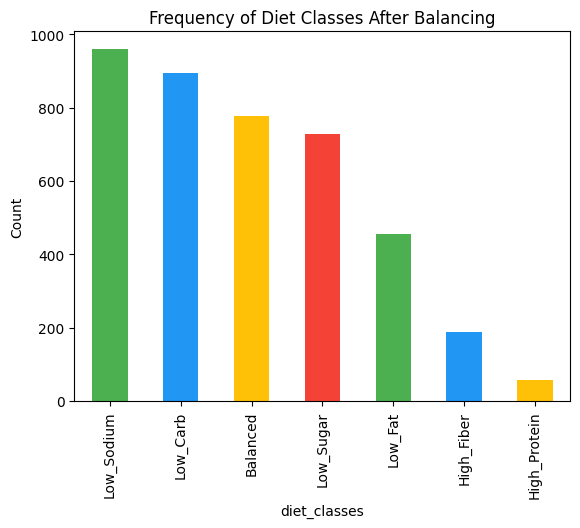

In [ ]:
food_df['diet_classes'] = food_df.apply(classify_diet, axis=1)
food_df_exploded = food_df.explode('diet_classes')
food_df_exploded['diet_classes'].value_counts().plot(
    kind='bar',
    color=['#4CAF50', '#2196F3', '#FFC107', '#F44336']
)
plt.title('Frequency of Diet Classes After Balancing')
plt.ylabel('Count')
plt.show()


In [ ]:
# Usage
balanced_df = balance_data(food_df)
print("Original Length:", len(food_df))
print("Resampled Length:", len(balanced_df))

Original Length: 1014
Resampled Length: 2499


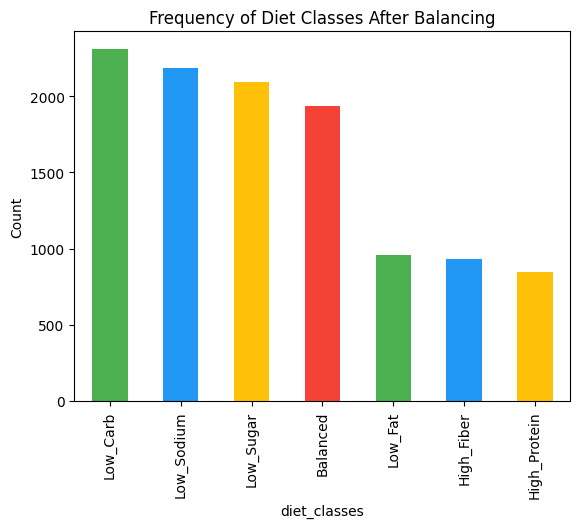

In [ ]:
balanced_df['diet_classes'] = balanced_df.apply(classify_diet, axis=1)
balanced_df_exploded = balanced_df.explode('diet_classes')
balanced_df_exploded['diet_classes'].value_counts().plot(
    kind='bar',
    color=['#4CAF50', '#2196F3', '#FFC107', '#F44336']
)
plt.title('Frequency of Diet Classes After Balancing')
plt.ylabel('Count')
plt.show()


testing


#Collected Data DB


In [ ]:
file_path = "collected_data.csv"
collected_df = pd.read_csv(file_path)
collected_df.shape

(1000, 13)

In [ ]:
collected_df.head()

,Gender,Age,Weight_kg,Height_cm,State,Physical_Activity_Level,Sleep_Quality,Meals_Per_Day,Water_Intake,Cheat_Day_Favorites,Healthy_Meal_Preferences,Disease_Type,Dietary_Restrictions
0,Female,19,53.2,150.5,Uttar Pradesh,occasionally (light activity),3,2,3-5 glasses a day,"['gobi biryani', 'pizza chole and momos', 'momos']","['egg for protein', 'mess food', 'sambar rice']",NaN,NaN
1,Female,18,52.5,159.9,Karnataka,occasionally (light activity),3,1,3-5 glasses a day,"['burger', 'chips', 'chocolate']","['fish', 'dal', 'tofu stir fry']",NaN,NaN
2,Male,18,58.2,160.3,Kerala,occasionally (light activity),3,2,3-5 glasses a day,"['junk food', 'mixed kebab with chips', 'pizza']","['basically home food', 'egg for protein', 'chicken salad']",NaN,NaN
3,Female,21,45.6,160.4,Kerala,occasionally (light activity),2,2,6-8 glasses a day,"['chicken mandi', 'zinger burger', 'burgers']","['and paneer masala', 'chapathi', 'sprouts salad']",NaN,Low sugar
4,Male,20,59.3,159.0,Kerala,occasionally (light activity),4,3,3-5 glasses a day,"['burger', 'mandhi', 'white sauce pasta']","['fruits', 'basically home food', 'rice meals']",NaN,NaN


In [ ]:

balanced_df['diet_classes'] = balanced_df.apply(classify_diet, axis=1)
balanced_df['health_condition_classes'] = balanced_df.apply(health_condition_classification, axis=1)
#display food name and last two cols, print any random 10
balanced_df[['food_name', 'diet_classes', 'health_condition_classes']].sample(10)


,food_name,diet_classes,health_condition_classes
772,Atta dal burfi,"[Low_Carb, Low_Sodium, Low_Fat, High_Fiber, Balanced]",[]
853,Spinach mushroom scrambled egg (Palak mushroom bhurji),"[Low_Carb, Low_Sodium, High_Protein, Low_Sugar, Balanced]",[]
894,Semolina dhokla (Suji/Rava dhokla),"[Low_Carb, Low_Sodium, Low_Fat, High_Fiber, Low_Sugar, Balanced]",[Diabetes-Friendly]
926,Jowar dosa,"[Low_Carb, Low_Sodium, Low_Fat, High_Fiber, Low_Sugar, Balanced]","[Heart-Healthy, Weight_Management]"
327,Onion pakora/pakoda (Pyaaz ke pakode),"[Low_Carb, Low_Sodium, Low_Sugar, Balanced]",[Renal-Friendly]
222,Tandoori chicken,"[Low_Carb, Low_Sodium, High_Protein, Low_Sugar, Balanced]",[Heart-Healthy]
333,Bread pakora/pakoda,"[Low_Carb, Low_Sodium, Low_Sugar, Balanced]",[Renal-Friendly]
649,Dil bahar,"[Low_Carb, Low_Sodium, Low_Fat, Balanced]",[Renal-Friendly]
916,Garlic soup,"[Low_Carb, Low_Sodium, Low_Sugar, Balanced]",[]
67,Chicken stock,"[Low_Carb, Low_Sodium, Low_Sugar, Balanced]","[Heart-Healthy, Renal-Friendly]"


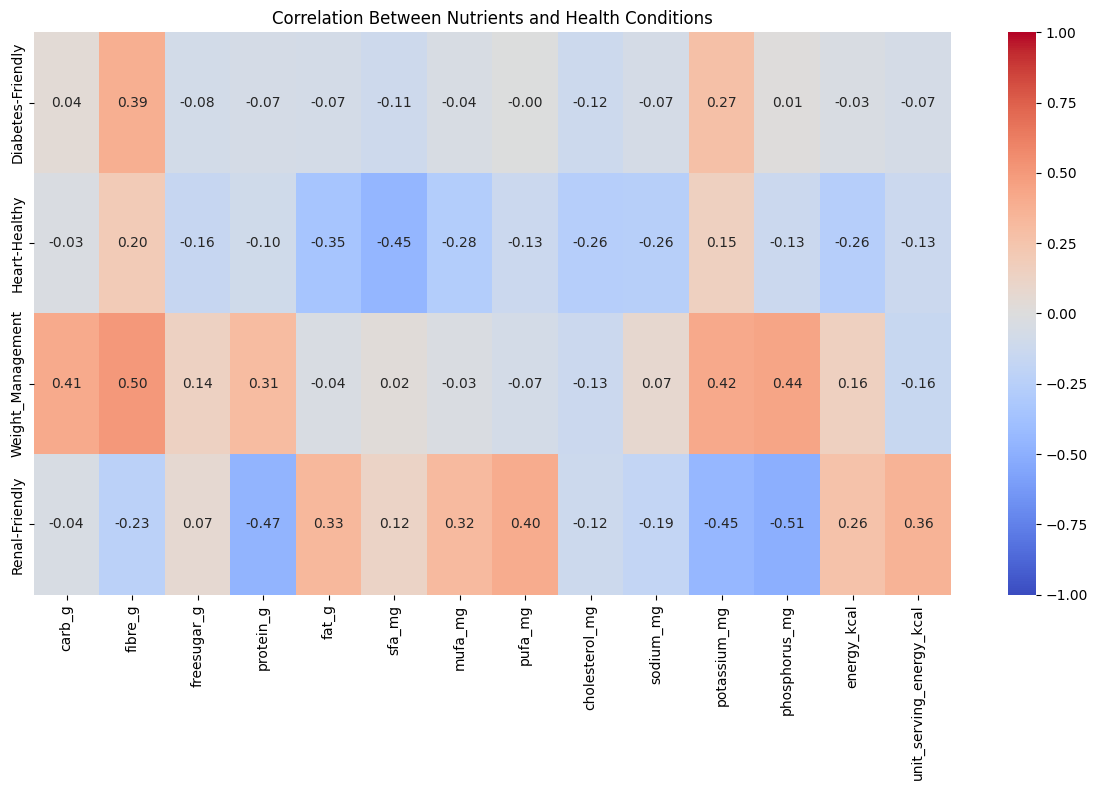

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Create binary columns for each health condition
conditions = ['Diabetes-Friendly', 'Heart-Healthy', 'Weight_Management', 'Renal-Friendly']
for cond in conditions:
    balanced_df[cond] = balanced_df['health_condition_classes'].apply(lambda x: 1 if cond in x else 0)

# Select relevant nutrient columns
nutrient_cols = [
    'carb_g', 'fibre_g', 'freesugar_g', 'protein_g', 'fat_g',
    'sfa_mg', 'mufa_mg', 'pufa_mg', 'cholesterol_mg',
    'sodium_mg', 'potassium_mg', 'phosphorus_mg',
    'energy_kcal', 'unit_serving_energy_kcal'
]

# Calculate correlations
corr_matrix = balanced_df[nutrient_cols + conditions].corr()

# Plot heatmap for health conditions
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.loc[conditions, nutrient_cols],
            annot=True, cmap='coolwarm', center=0,
            vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Between Nutrients and Health Conditions')
plt.tight_layout()
plt.show()

Mapping diet classes to indian food

In [ ]:
#show df.head() with all cols
pd.set_option('display.max_columns', None)
balanced_df.head()

,food_name,energy_kj,energy_kcal,carb_g,protein_g,fat_g,freesugar_g,fibre_g,sfa_mg,mufa_mg,pufa_mg,cholesterol_mg,calcium_mg,phosphorus_mg,magnesium_mg,sodium_mg,potassium_mg,iron_mg,copper_mg,selenium_ug,chromium_mg,manganese_mg,molybdenum_mg,zinc_mg,vita_ug,vite_mg,vitd2_ug,vitd3_ug,vitk1_ug,vitk2_ug,folate_ug,vitb1_mg,vitb2_mg,vitb3_mg,vitb5_mg,vitb6_mg,vitb7_ug,vitb9_ug,vitc_mg,carotenoids_ug,servings_unit,unit_serving_energy_kj,unit_serving_energy_kcal,unit_serving_carb_g,unit_serving_protein_g,unit_serving_fat_g,unit_serving_freesugar_g,unit_serving_fibre_g,unit_serving_sfa_mg,unit_serving_mufa_mg,unit_serving_pufa_mg,unit_serving_cholesterol_mg,unit_serving_calcium_mg,unit_serving_phosphorus_mg,unit_serving_magnesium_mg,unit_serving_sodium_mg,unit_serving_potassium_mg,unit_serving_iron_mg,unit_serving_copper_mg,unit_serving_selenium_ug,unit_serving_chromium_mg,unit_serving_manganese_mg,unit_serving_molybdenum_mg,unit_serving_zinc_mg,unit_serving_vita_ug,unit_serving_vite_mg,unit_serving_vitd2_ug,unit_serving_vitd3_ug,unit_serving_vitk1_ug,unit_serving_vitk2_ug,unit_serving_folate_ug,unit_serving_vitb1_mg,unit_serving_vitb2_mg,unit_serving_vitb3_mg,unit_serving_vitb5_mg,unit_serving_vitb6_mg,unit_serving_vitb7_ug,unit_serving_vitb9_ug,unit_serving_vitc_mg,unit_serving_carotenoids_ug,diet_classes,health_condition_classes,Diabetes-Friendly,Heart-Healthy,Weight_Management,Renal-Friendly
0,Hot tea (Garam Chai),68.161522,16.144299,2.581948,0.387886,0.532067,2.576010,0.000000,321.496429,144.180527,16.389549,0.0,14.204275,11.501187,1.035629,3.118765,13.945368,0.021615,0.005914,0.112827,0.000475,0.002257,0.000000,0.041093,0.0,0.026128,0.000000,0.0,0.001924,0.0,0.856295,0.003563,0.013207,0.009501,0.040665,0.004751,0.242280,0.856295,0.238717,23.752970,tea cup,143.479996,33.983749,5.435000,0.816500,1.120000,5.422500,0.000000,676.750000,303.500000,34.500000,0.0,29.900000,24.209999,2.1800,6.565000,29.355000,0.045500,0.012450,0.237500,0.001000,0.004750,0.0000,0.086500,0.0,0.05500,0.000000,0.0,0.00405,0.0,1.8025,0.007500,0.027800,0.02000,0.08560,0.010000,0.510000,1.8025,0.502500,50.000000,"[Low_Carb, Low_Sodium, Low_Fat, Low_Sugar, Balanced]",[Renal-Friendly],0,0,0,1
1,Instant coffee,97.766670,23.155832,3.653333,0.640667,0.746667,3.615000,0.000000,451.166656,202.333328,23.000000,0.0,20.866667,18.186666,3.633333,4.916667,44.500000,0.061000,0.012333,0.218333,0.000667,0.015667,0.000000,0.065000,0.0,0.036667,0.000000,0.0,0.028667,0.0,1.245000,0.005267,0.019733,0.178667,0.056667,0.006800,0.776667,1.245000,0.335000,33.333332,tea cup,439.950012,104.201248,16.440001,2.883000,3.360000,16.267500,0.000000,2030.250000,910.500000,103.500000,0.0,93.900002,81.839996,16.3500,22.125000,200.250000,0.274500,0.055500,0.982500,0.003000,0.070500,0.0000,0.292500,0.0,0.16500,0.000000,0.0,0.12900,0.0,5.6025,0.023700,0.088800,0.80400,0.25500,0.030600,3.495000,5.6025,1.507500,150.000000,"[Low_Carb, Low_Sodium, Low_Fat, Low_Sugar, Balanced]",[Renal-Friendly],0,0,0,1
2,Espreso coffee,216.996841,51.543373,6.620505,1.747003,2.138170,6.533754,0.000000,1291.671875,580.157715,66.214508,0.0,58.104099,50.249210,8.574133,13.977918,103.864349,0.147634,0.038202,0.563091,0.001893,0.034385,0.000000,0.191483,0.0,0.105394,0.000000,0.0,0.054259,0.0,3.487382,0.014763,0.054890,0.352681,0.161830,0.019211,1.810726,3.487382,0.951104,94.637222,tea cup,343.940002,81.696251,10.493500,2.769000,3.389000,10.356000,0.000000,2047.300049,919.549988,104.949997,0.0,92.095001,79.644997,13.5900,22.154999,164.625000,0.234000,0.060550,0.892500,0.003000,0.054500,0.0000,0.303500,0.0,0.16705,0.000000,0.0,0.08600,0.0,5.5275,0.023400,0.087000,0.55900,0.25650,0.030450,2.870000,5.5275,1.507500,150.000000,"[Low_Carb, Low_Sodium, Low_Fat, Low_Sugar, Balanced]",[Renal-Friendly],0,0,0,1
3,Iced tea,44.090622,10.342188,2.701562,0.027969,0.010937,2.701562,0.000000,5.468750,0.000000,5.468750,0.0,1.179688,0.584375,0.390625,0.234375,5.215625,0.021406,0.003063,0.054688,0.000000,0.000938,0.000000,0.007969,0.0,0.00000

##DISCOVERY
- Dataset contains imbalanced data, majority is low sodium, very low carb, low sugar
- Very less high fiber and high protein foods
- No food item within balanced nutrient thresholds


#FUZZY RULESET

In [ ]:
def create_fuzzy_system():
    # Input variables
    bmi = ctrl.Antecedent(np.arange(10, 50, 0.1), 'bmi')
    glucose = ctrl.Antecedent(np.arange(70, 250, 1), 'glucose')
    cholesterol = ctrl.Antecedent(np.arange(100, 300, 1), 'cholesterol')
    blood_pressure = ctrl.Antecedent(np.arange(80, 200, 1), 'blood_pressure')
    activity = ctrl.Antecedent(np.arange(0, 15, 0.1), 'activity')
    age = ctrl.Antecedent(np.arange(18, 100, 1), 'age')

    # Output variable with expanded diet classes
    diet_class = ctrl.Consequent(np.arange(0, 110, 1), 'diet_class')

    # Membership functions for BMI with overlap
    bmi['underweight'] = fuzz.trimf(bmi.universe, [10, 15, 18.5])
    bmi['normal'] = fuzz.trimf(bmi.universe, [17, 22, 27])       # Overlaps with underweight and overweight
    bmi['overweight'] = fuzz.trimf(bmi.universe, [25, 27.5, 30])
    bmi['obese'] = fuzz.trimf(bmi.universe, [28, 35, 42])        # Overlaps with overweight and severely_obese
    bmi['severely_obese'] = fuzz.trimf(bmi.universe, [40, 45, 50])

    # Membership functions for glucose with overlap
    glucose['normal'] = fuzz.trimf(glucose.universe, [70, 90, 120])      # Extends to 120
    glucose['prediabetic'] = fuzz.trimf(glucose.universe, [100, 125, 150]) # Overlaps both normal and diabetic
    glucose['diabetic'] = fuzz.trimf(glucose.universe, [130, 180, 250])   # Starts at 130

    # Membership functions for cholesterol with overlap
    cholesterol['normal'] = fuzz.trimf(cholesterol.universe, [100, 150, 220])      # Extends to 220
    cholesterol['borderline'] = fuzz.trimf(cholesterol.universe, [190, 225, 260])  # Overlaps both
    cholesterol['high'] = fuzz.trimf(cholesterol.universe, [240, 275, 300])        # Starts at 240

    # Membership functions for blood pressure with overlap
    blood_pressure['normal'] = fuzz.trimf(blood_pressure.universe, [80, 100, 130])     # Extends to 130
    blood_pressure['elevated'] = fuzz.trimf(blood_pressure.universe, [120, 130, 150])  # Overlaps normal and high
    blood_pressure['high'] = fuzz.trimf(blood_pressure.universe, [140, 160, 190])      # Overlaps elevated and crisis
    blood_pressure['crisis'] = fuzz.trimf(blood_pressure.universe, [170, 190, 200])    # Starts at 170

    # Membership functions for activity with overlap
    activity['sedentary'] = fuzz.trimf(activity.universe, [0, 2, 6])           # Extends to 6
    activity['moderate'] = fuzz.trimf(activity.universe, [4, 7, 11])           # Overlaps sedentary and active
    activity['active'] = fuzz.trimf(activity.universe, [9, 12, 15])            # Starts at 9

    # Membership functions for age with overlap
    age['young'] = fuzz.trimf(age.universe, [18, 25, 40])          # Extends to 40
    age['middle'] = fuzz.trimf(age.universe, [35, 50, 70])         # Overlaps young and senior
    age['senior'] = fuzz.trimf(age.universe, [60, 75, 100])        # Starts at 60
    # Membership functions for diet class (expanded)
    diet_class['low_carb'] = fuzz.trimf(diet_class.universe, [0, 15, 30])
    diet_class['low_sodium'] = fuzz.trimf(diet_class.universe, [15, 30, 45])
    diet_class['high_protein'] = fuzz.trimf(diet_class.universe, [30, 45, 60])
    diet_class['low_fat'] = fuzz.trimf(diet_class.universe, [45, 60, 75])
    diet_class['high_fiber'] = fuzz.trimf(diet_class.universe, [60, 75, 90])
    diet_class['low_sugar'] = fuzz.trimf(diet_class.universe, [75, 90, 105])
    diet_class['balanced'] = fuzz.trimf(diet_class.universe, [0, 50, 100])
    diet_class['diabetes_friendly'] = fuzz.smf(diet_class.universe, 60, 90)
    diet_class['heart_healthy'] = fuzz.smf(diet_class.universe, 70, 100)
    diet_class['weight_management'] = fuzz.smf(diet_class.universe, 80, 110)

    # Define comprehensive rules
    rules = [
        # Diabetes-related rules
        ctrl.Rule(glucose['diabetic'], diet_class['diabetes_friendly']),
        ctrl.Rule(glucose['prediabetic'] & bmi['overweight'], diet_class['low_carb']),
        ctrl.Rule(glucose['prediabetic'] & bmi['obese'], diet_class['low_carb']),

        # Heart health rules
        ctrl.Rule((blood_pressure['high'] | blood_pressure['crisis']) & cholesterol['high'], diet_class['heart_healthy']),
        ctrl.Rule(cholesterol['high'] & ~glucose['diabetic'], diet_class['low_fat']),
        ctrl.Rule(blood_pressure['elevated'] | blood_pressure['high'], diet_class['low_sodium']),

        # Weight management rules
        ctrl.Rule(bmi['obese'] | bmi['severely_obese'], diet_class['weight_management']),
        ctrl.Rule(bmi['overweight'] & activity['sedentary'], diet_class['weight_management']),

        # Activity and protein rules
        ctrl.Rule(activity['active'] & (bmi['underweight'] | bmi['normal']), diet_class['high_protein']),
        ctrl.Rule(activity['moderate'] & age['young'], diet_class['high_protein']),

        # Age-specific rules
        ctrl.Rule(age['senior'] & ~(glucose['diabetic'] | cholesterol['high']), diet_class['high_fiber']),
        ctrl.Rule(age['middle'] & bmi['normal'], diet_class['balanced']),

        # Healthy baseline rules
        ctrl.Rule(bmi['normal'] & glucose['normal'] & blood_pressure['normal'] & cholesterol['normal'], diet_class['balanced']),

        # Sugar control rules
        ctrl.Rule((glucose['prediabetic'] | glucose['diabetic']) & ~bmi['underweight'], diet_class['low_sugar']),

        # Combination rules
        ctrl.Rule(bmi['overweight'] & glucose['normal'] & blood_pressure['normal'], diet_class['low_fat']),
        ctrl.Rule(activity['sedentary'] & (bmi['normal'] | bmi['overweight']), diet_class['low_fat'])
    ]

    # Create control system
    diet_ctrl = ctrl.ControlSystem(rules)

    return ctrl.ControlSystemSimulation(diet_ctrl)

#Apply fuzzy rules to the dataset

In [ ]:

# Function to determine diet recommendation using fuzzy logic
def get_fuzzy_diet_recommendation(row, fuzzy_system):
    try:
        # Set input values
        fuzzy_system.input['bmi'] = row['BMI']
        fuzzy_system.input['glucose'] = row['Glucose_mg/dL']
        fuzzy_system.input['cholesterol'] = row['Cholesterol_mg/dL']
        fuzzy_system.input['blood_pressure'] = row['Blood_Pressure_mmHg']
        fuzzy_system.input['activity'] = row['Weekly_Exercise_Hours']

        # Compute result
        fuzzy_system.compute()

        # Get the output value
        output_value = fuzzy_system.output['diet_class']

        # Determine diet class based on output value
        if output_value < 30:
            return 'Low_Carb'
        elif output_value < 50:
            return 'Low_Sodium'
        elif output_value < 70:
            return 'Balanced'
        else:
            return 'High_Protein'
    except:
        # Fallback to rule-based classification if fuzzy system fails
        return rule_based_diet_recommendation(row)

# Rule-based diet recommendation as fallback
def rule_based_diet_recommendation(row):
    if row['Disease_Type'] == 'Diabetes':
        return 'Low_Carb'
    elif row['Disease_Type'] == 'Hypertension':
        return 'Low_Sodium'
    elif row['Weekly_Exercise_Hours'] > 8:
        return 'High_Protein'
    else:
        return 'Balanced'

# Function to get additional health-specific diet classes
def get_health_specific_classes(row):
    classes = []

    if row['Disease_Type'] == 'Diabetes' or row['Glucose_mg/dL'] > 130:
        classes.append('Diabetes-Friendly')

    if row['Disease_Type'] == 'Hypertension' or row['Blood_Pressure_mmHg'] > 140:
        classes.append('Heart-Healthy')

    if row['BMI'] > 27 or row['Disease_Type'] == 'Obesity' :
        classes.append('Weight_Management')

    if row['Dietary_Restrictions'] == 'Low_Sodium':
        classes.append('Renal-Friendly')

    if row['Dietary_Restrictions'] == 'Low_Sugar':
        classes.append('Low_Sugar')

    return classes

def apply_new_diet_classification(df):
    # Create fuzzy system
    fuzzy_system = create_fuzzy_system()

    # Apply fuzzy logic to get primary diet recommendation
    df['New_Diet_Recommendation'] = df.apply(lambda row: get_fuzzy_diet_recommendation(row, fuzzy_system), axis=1)

    # Get additional health-specific classes
    df['Additional_Diet_Classes'] = df.apply(get_health_specific_classes, axis=1)

    # Combine primary recommendation with additional classes
    df['Complete_Diet_Classes'] = df.apply(
        lambda row: [row['New_Diet_Recommendation']] + row['Additional_Diet_Classes'],
        axis=1
    )

    return df


df = apply_new_diet_classification(df)
# df = df.drop(['New_Diet_Recommendation', 'Additional_Diet_Classes'], axis=1)
print(df[['Age', 'BMI', 'Disease_Type', 'Diet_Recommendation', 'Complete_Diet_Classes']].head(10))



   Age   BMI  Disease_Type Diet_Recommendation  \
0   56  22.8       Obesity            Balanced   
1   69  35.4      Diabetes            Low_Carb   
2   46  21.2  Hypertension          Low_Sodium   
3   32  21.6           NaN            Balanced   
4   60  20.5      Diabetes            Low_Carb   
5   25  43.4       Obesity            Balanced   
6   78  35.4           NaN            Balanced   
7   38  14.7      Diabetes            Low_Carb   
8   56  26.7       Obesity            Balanced   
9   75  23.2  Hypertension          Low_Sodium   

                                     Complete_Diet_Classes  
0                            [Balanced, Weight_Management]  
1         [Low_Carb, Diabetes-Friendly, Weight_Management]  
2                              [Low_Sodium, Heart-Healthy]  
3             [Balanced, Diabetes-Friendly, Heart-Healthy]  
4  [Low_Carb, Diabetes-Friendly, Heart-Healthy, Low_Sugar]  
5             [Balanced, Heart-Healthy, Weight_Management]  
6         [High_Protei

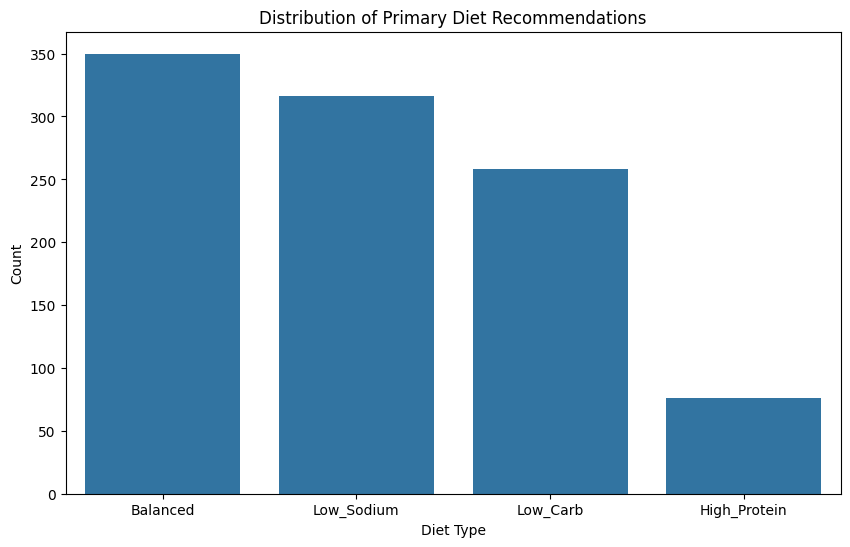

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of primary diet recommendations
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='New_Diet_Recommendation', order=df['New_Diet_Recommendation'].value_counts().index)
plt.title('Distribution of Primary Diet Recommendations')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

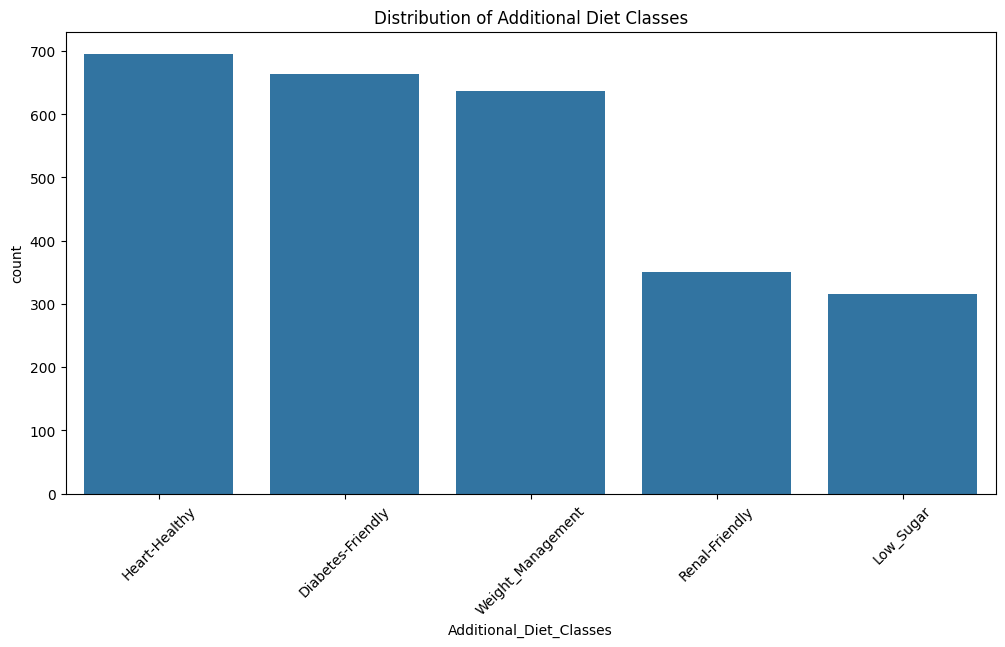

In [ ]:
# Explode the additional classes for counting
exploded_classes = df.explode('Additional_Diet_Classes', ignore_index=True) # Reset index after exploding

plt.figure(figsize=(12, 6))
sns.countplot(data=exploded_classes, x='Additional_Diet_Classes',
              order=exploded_classes['Additional_Diet_Classes'].value_counts().index)
plt.title('Distribution of Additional Diet Classes')
plt.xticks(rotation=45)
plt.show()

##append relevant foods according to the classes

In [ ]:
import pandas as pd

def match_foods_to_users(df, balanced_df):
    user_food_recommendations = []

    for user_classes in df['Complete_Diet_Classes']:
        # Filter foods that match ALL of the user's classes
        matching_foods = balanced_df[balanced_df['diet_classes'].apply(lambda x: all(cls in x for cls in user_classes))]

        # If no exact match, find foods that match at least the health condition class
        if matching_foods.empty:
            matching_foods = balanced_df[balanced_df['health_condition_classes'].apply(lambda x: any(cls in x for cls in user_classes))]

        user_food_recommendations.append(matching_foods['food_name'].tolist())

    return user_food_recommendations

# Match foods to users
df['Recommended_Foods'] = match_foods_to_users(df, balanced_df)
#print the food items fully
pd.set_option('display.max_colwidth', None)
df[['Complete_Diet_Classes', 'Recommended_Foods']].head()

#show users with complete_diet_classes as only 'balanced'
df[df['Complete_Diet_Classes'].apply(lambda x: 'Balanced' in x)][['Complete_Diet_Classes', 'Recommended_Foods']].head()

,Complete_Diet_Classes,Recommended_Foods
0,"[Balanced, Weight_Management]","[Cheese and pineapple sandwich (Cheese aur ananas ka sandwich), Peanut and tomato sandwich (Moongfali aur tamatar ka sandwich), Rainbow sandwich, Mushroom and cheese sandwich (toasted), Paneer pea sandwich (toasted) (Paneer matar ka sandwich), Pea keema sandwich (toasted) (Matar aur keema ka sandwich), Lentil soup, Keema parantha/paratha, Paneer parantha/paratha, Semolina dosa (Suji/Rava dosa), Soyabean curry, Coconut burfi (Nariyal ki burfi), Gram flour burfi (Besan burfi), Gram flour ladoo (Besan ladoo), Sesame ladoo (Til ke ladoo), Peanut chutney (Mungfali ki chutney), Peanut biscuit, Peanut burfi (Moongfali ki burfi), Wheat flour and moong dal burfi (Atta aur moong dal ki burfi), Sweet split chickpea roti (Sweet channa dal roti/Puranpoli), Pearl millet ladoo (Bajra ladoo), Paushtik ladoo, Paushtik roti, Dhokla, Spanish omelette/omlet, Green pea soup (Matar ka soup), Mulligatawny soup, Instant idli (with semolina), Plain dosa, Khoa coconut burfi, Khoa ladoo, Wheat and gram flour ladoo (Atta besan ladoo), Sesame chickpeas brittle (Til aur channe ki chikki), Instant dhokla, Walnut chutney (Akhrot ki chutney), Gun powder chutney, Dessicated coconut chutney (Sookhe kase nariyal ki chutney) , Peanut butter cucumber sandwich, Mint and peanut sandwich, Spicy chutney sandwich, Checker board sandwich, Sesame biscuit (Til ke biscuit), Besan bathua chilla/cheela, Wheat flour and nuts ladoos (Atta nuts ladoos), Gram flour and semolina dhokla (Besan suji dhokla), Soya roti, Semolina idli (Suji/Rava idli), Oats burfi, Amaranth ladoo (Rajgira ladoo), Pav bhaji masala, Gram flour chilla/cheela (Besan chilla/cheela), Moong bean dosa (Pesarattu), Methi thepla, Almond cardamom cake (Badam elaichi cake), Millet soup, Jowar dosa, Classic seasoned black beans, Maa chaane ki dal, Wheat and gram flour ladoo (Atta besan ladoo), Wheat flour and nuts ladoos (Atta nuts ladoos), Spicy chutney sandwich, Khoa coconut burfi, Gram flour burfi (Besan burfi), Peanut chutney (Mungfali ki chutney), Wheat flour and moong dal burfi (Atta aur moong dal ki burfi), Oats burfi, Gram flour burfi (Besan burfi), Jowar dosa, Khoa coconut burfi, Oats burfi, Khoa ladoo, Gram flour burfi (Besan burfi), Sweet split chickpea roti (Sweet channa dal roti/Puranpoli), Dhokla, Peanut burfi (Moongfali ki burfi), Gram flour and semolina dhokla (Besan suji dhokla), Paneer parantha/paratha, Pav bhaji masala, Khoa coconut burfi, Peanut and tomato sandwich (Moongfali aur tamatar ka sandwich), Peanut burfi (Moongfali ki burfi), Coconut burfi (Nariyal ki burfi), Oats burfi, Pav bhaji masala, Dhokla, Plain dosa, Semolina idli (Suji/Rava idli), Besan bathua chilla/cheela, Besan bathua chilla/cheela, Mint and peanut sandwich, Moong bean dosa (Pesarattu), Classic seasoned black beans, Peanut chutney (Mungfali ki chutney), Sesame biscuit (Til ke biscuit), Gun powder chutney, Coconut burfi (Nariyal ki burfi), Paneer parantha/paratha, Gun powder chutney, Gun powder chutney, Gun powder chutney, ...]"
3,"[Balanced, Diabetes-Friendly, Heart-Healthy]","[Raw mango drink (Aam panna), Fruit Punch (with fresh juices), Fruit Punch (with squashes), Lemonade, Lem-o-gin, Cumin infused water (Jeere/Zeere ka pani), Summer cooler, Pin wheel sandwich, Pea potato sandwich (toasted) (Matar aloo ka sandwich), Cracked wheat porridge (Meetha daliya), Boiled egg (Ubla anda), Pancake, Vegetable pancake, Jam and fruit pancake, Brown stock, Chicken stock, Hot and sour soup, Plain parantha/paratha, Potato parantha/paratha (Aloo ka parantha/paratha), Radish parantha/paratha (Mooli ka parantha/paratha), Cauliflower parantha/paratha (Phoolgobhi ka parantha/paratha), Dal parantha/paratha, Sprouted moong parantha/paratha, Pea parantha/paratha (Matar ka parantha/paratha), Besan and spinach parantha/paratha (Besan aur palak ka parantha/paratha), Boiled rice (Uble chawal), Plain pulao, Mixed vegetable pulao, Mushroom pulao, Sprouted moong pulao, Peanut 

In [ ]:
import pandas as pd
import numpy as np

class FoodRecommendationRL:
    def __init__(self, balanced_df):
        self.balanced_df = balanced_df
        self.user_preferences = {}
        self.food_weights = {}
        self.learning_rate = 0.1

    def match_foods_to_user(self, user_classes):
        # Filter foods that match ALL of the user's classes
        matching_foods = self.balanced_df[self.balanced_df['diet_classes'].apply(lambda x: all(cls in x for cls in user_classes))]

        # If no exact match, find foods that match at least the health condition class
        if matching_foods.empty:
            matching_foods = self.balanced_df[self.balanced_df['health_condition_classes'].apply(lambda x: any(cls in x for cls in user_classes))]

        return matching_foods['food_name'].tolist()

    def get_initial_recommendations(self, user_id, user_classes):
        recommended_foods = self.match_foods_to_user(user_classes)

        for food in recommended_foods:
            if food not in self.food_weights:
                self.food_weights[food] = 1.0

        return recommended_foods

    def get_weighted_recommendations(self, user_id, recommended_foods, top_n=30):
        weighted_foods = [(food, self.food_weights.get(food, 1.0))
                          for food in recommended_foods]
        weighted_foods.sort(key=lambda x: x[1], reverse=True)
        return [food for food, _ in weighted_foods[:top_n]]

    def update_weights(self, user_id, food, liked):
        if user_id not in self.user_preferences:
            self.user_preferences[user_id] = {}

        self.user_preferences[user_id][food] = liked

        current_weight = self.food_weights.get(food, 1.0)
        if liked:
            new_weight = current_weight + self.learning_rate
        else:
            new_weight = current_weight - self.learning_rate

        self.food_weights[food] = max(0.1, min(new_weight, 2.0))

    def get_recommendations(self, user_id, user_classes, top_n=10):
        initial_recs = self.get_initial_recommendations(user_id, user_classes)

        if user_id in self.user_preferences and self.user_preferences[user_id]:
            weighted_recs = self.get_weighted_recommendations(user_id, initial_recs, top_n)
            return weighted_recs

        return initial_recs[:top_n]

# Example of how to use with your fuzzy logic system:
# Initialize the recommender
recommender = FoodRecommendationRL(balanced_df)

# Get recommendations for a user based on their fuzzy-derived classes
def get_personalized_recommendations(row):
    user_id = row.name  # Using DataFrame index as user_id
    user_classes = row['Complete_Diet_Classes']  # From your fuzzy logic system
    return recommender.get_recommendations(user_id, user_classes)

# Apply to get initial recommendations
df['Recommended_Foods'] = df.apply(get_personalized_recommendations, axis=1)

# Example of simulating user feedback
# For user with index 0
user_id = 0
if len(df.loc[user_id, 'Recommended_Foods']) > 0:
    # User likes the first food
    recommender.update_weights(user_id, df.loc[user_id, 'Recommended_Foods'][0], liked=True)

    # User dislikes the second food (if available)
    if len(df.loc[user_id, 'Recommended_Foods']) > 1:
        recommender.update_weights(user_id, df.loc[user_id, 'Recommended_Foods'][1], liked=False)

# Update recommendations after feedback
df['Updated_Recommendations'] = df.apply(get_personalized_recommendations, axis=1)

# View the results
print(df[['Complete_Diet_Classes', 'Recommended_Foods', 'Updated_Recommendations']].head())


                                     Complete_Diet_Classes  \
0                            [Balanced, Weight_Management]   
1         [Low_Carb, Diabetes-Friendly, Weight_Management]   
2                              [Low_Sodium, Heart-Healthy]   
3             [Balanced, Diabetes-Friendly, Heart-Healthy]   
4  [Low_Carb, Diabetes-Friendly, Heart-Healthy, Low_Sugar]   

                                                                                                                                                                                                                                                                                                                                                                                                              Recommended_Foods  \
0                 [Cheese and pineapple sandwich (Cheese aur ananas ka sandwich), Peanut and tomato sandwich (Moongfali aur tamatar ka sandwich), Rainbow sandwich, Mushroom and cheese sandwich (toasted), Pane

In [ ]:
# Create a sample new user with custom values
new_user = {
    'BMI': 22.5,
    'Glucose_mg/dL': 200,
    'Cholesterol_mg/dL': 200,
    'Blood_Pressure_mmHg': 120,
    'Weekly_Exercise_Hours': 6,
    'Disease_Type': '',
    'Dietary_Restrictions': ''
}

# Convert to DataFrame
new_user_df = pd.DataFrame([new_user])

# Apply fuzzy logic to get diet classes
new_user_df = apply_new_diet_classification(new_user_df)

# Print the diet classes assigned to the new user
print(f"Diet classes for new user: {new_user_df.loc[0, 'Complete_Diet_Classes']}")

# Get food recommendations for the new user
user_id = 'new_user'
user_classes = new_user_df.loc[0, 'Complete_Diet_Classes']
initial_recommendations = recommender.get_recommendations(user_id, user_classes)
print(f"Initial food recommendations: {initial_recommendations[:10]}")
print(f"Initial food recommendations Count : {len(initial_recommendations)}")

# Simulate user feedback
if len(initial_recommendations) > 0:
    # User likes first food
    recommender.update_weights(user_id, initial_recommendations[0], liked=True)
    print(f"User liked: {initial_recommendations[0]}")

    # User dislikes second food
    if len(initial_recommendations) > 1:
        recommender.update_weights(user_id, initial_recommendations[1], liked=False)
        print(f"User disliked: {initial_recommendations[1]}")

# Get updated recommendations
updated_recommendations = recommender.get_recommendations(user_id, user_classes)
print(f"Updated food recommendations: {updated_recommendations[:5]}")

# Check how weights changed
if len(initial_recommendations) > 1:
    print(f"Weight for {initial_recommendations[0]}: {recommender.food_weights.get(initial_recommendations[0], 1.0)}")
    print(f"Weight for {initial_recommendations[1]}: {recommender.food_weights.get(initial_recommendations[1], 1.0)}")


Diet classes for new user: ['Balanced', 'Diabetes-Friendly']
Initial food recommendations: ['Plain parantha/paratha', 'Dal parantha/paratha', 'Pea parantha/paratha (Matar ka parantha/paratha)', 'Black channa curry/Bengal gram curry (Kale chane ki curry)', 'Soyabean curry', 'Kidney bean curry (Rajmah curry)', 'Khatta channa', 'Beans with coconut (Nariyal aur sem/phali; Beans thoran)', 'Cauliflower with coconut (Nariyal ke saath phoolgobhi)', 'Peanut chutney (Mungfali ki chutney)']
Initial food recommendations Count : 10
User liked: Plain parantha/paratha
User disliked: Dal parantha/paratha
Updated food recommendations: ['Plain parantha/paratha', 'Plain parantha/paratha', 'Plain parantha/paratha', 'Plain parantha/paratha', 'Pea parantha/paratha (Matar ka parantha/paratha)']
Weight for Plain parantha/paratha: 1.1
Weight for Dal parantha/paratha: 0.9
